In [1]:
import pickle
import os
import numpy as np
import csv
import random
import matplotlib.pyplot as plt
import copy
import cv2
import tensorflow as tf
from skimage import transform
from skimage.transform import warp, SimilarityTransform, AffineTransform
from skimage import exposure
from sklearn.utils import shuffle
from numpy import random
from tensorflow.contrib.layers import flatten

print('All modules imported.')

All modules imported.


In [2]:
training_file='./data/train.p'
validation_file ='./data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
print()
print("Image Shape: {}".format(X_train[0].shape))
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)
Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)


# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of validation examples =", n_validation)
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of validation examples = 4410
Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


26


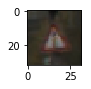

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

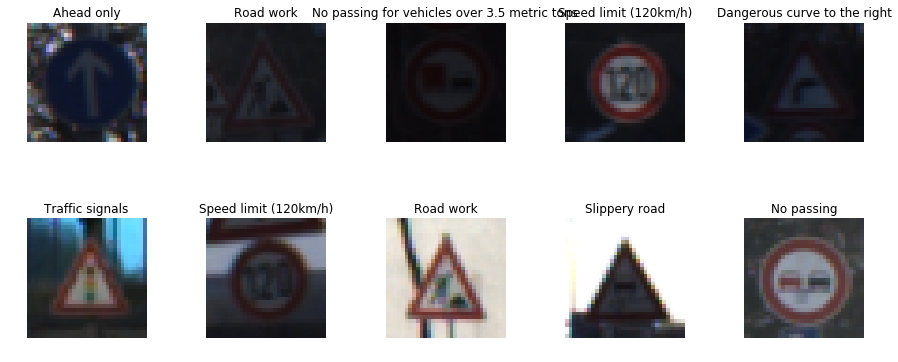

In [6]:
from pandas import read_csv

label_signs = read_csv('./signnames.csv').values[:, 1]  # fetch only sign names

fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(label_signs[y_train[index]])

In [7]:
# Data preprocessing
# Convert to grayscale
def convert_RGB_GRY(data, keepdims):
    input_rgb = data
    input_gry = np.sum(data/3, axis=3, keepdims=keepdims)
    return input_rgb, input_gry

X_train_rgb, X_train_gry = convert_RGB_GRY(X_train, keepdims=True)
X_valid_rgb, X_valid_gry = convert_RGB_GRY(X_valid, keepdims=True)
X_test_rgb, X_test_gry = convert_RGB_GRY(X_test, keepdims=True)

print('RGB shape for train:', X_train_rgb.shape)
print('RGB shape for valid:', X_valid_rgb.shape)
print('RGB shape for test:', X_test_rgb.shape)

print('Grayscale shape for train:', X_train_gry.shape)
print('Grayscale shape for valid:', X_valid_gry.shape)
print('Grayscale shape for test:', X_test_gry.shape)

RGB shape for train: (34799, 32, 32, 3)
RGB shape for valid: (4410, 32, 32, 3)
RGB shape for test: (12630, 32, 32, 3)
Grayscale shape for train: (34799, 32, 32, 1)
Grayscale shape for valid: (4410, 32, 32, 1)
Grayscale shape for test: (12630, 32, 32, 1)


In [8]:
# Replace training, validation and testing variables with grayscale.
X_train = X_train_gry
X_valid = X_valid_gry
X_test = X_test_gry

print('Updated train, test and validation set to gray scale.')

Updated train, test and validation set to gray scale.


In [9]:
# Mean of the train, valid and test dataset before normalization, our target is to be near zero
print(np.mean(X_train))
print(np.mean(X_valid))
print(np.mean(X_test))

82.677589037
83.5564273756
82.1484603612


In [10]:
# Updated mean value,near to zero
# Normalize the train, valid and test datasets to (-1,1)
X_train_normalized = (X_train - 128)/128 
X_valid_normalized = (X_valid - 128)/128 
X_test_normalized = (X_test - 128)/128

print(np.mean(X_train_normalized))
print(np.mean(X_valid_normalized))
print(np.mean(X_test_normalized))

-0.354081335648
-0.347215411128
-0.358215153428


Original shape: (34799, 32, 32, 1)
Normalized shape: (34799, 32, 32, 1)


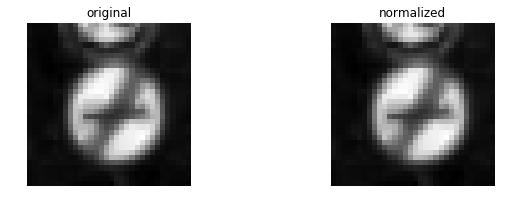

In [11]:
print("Original shape:", X_train.shape)
print("Normalized shape:", X_train_normalized.shape)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('original')
axs[0].imshow(X_train[0].squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('normalized')
axs[1].imshow(X_train_normalized[0].squeeze(), cmap='gray')

In [12]:
#Set values in train, validation and test set to normalized values.
X_train = X_train_normalized
X_valid = X_valid_normalized
X_test = X_test_normalized

In [13]:
# Shuffle the training set.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

print('Data is now shuffuled for intial input. Here`s top 500 values represented via their labels.')
print(y_train[0:500])

Data is now shuffuled for intial input. Here`s top 500 values represented via their labels.
[15 35 33 28  9 17 13 41 25 13  2  5 18 13 25 10 36 32 37 15  9  5  5 38 25
 17  8 10  8 33 18  1  1 13  1  4 18  5 38 13  2 12  8 31 35 42  4 28  4 13
 37 13 10  5 31  8 29 22  2 13 13 23 14 31 35  1  9 10  7  8 35 25 14  1 19
 10 12  8 25 35 38 18 17 39  9  5  1 38 34 17 39  1  3 11 14 13 13 20 28 32
  9 25 13 38 10 29 17  8  7  4  1 33 34 33  4 38 13 23  3 13 11 33 16  8  1
 12  1 12 25 25 12 14 20 38  5 31 13 38 18 24  8 31  9  7 10 30 10  3 25  5
 31  8  4 10 33 10 14 25 12 26 17 40 17 26 12  3 33  3  3 13 41 25  5  3 25
 35  7  9  7  0  8 20  5 13  3 14 15  9  4 12 35 26  2  5 30 11  3 19 17  1
 13  2  9 35 10 13 18  3 27  8 17 17 25 13 12 38  3  2 14 11 24  7  2 12  4
 12 22 13 25 16  4 31 17 38  4 12 31 25 10  5  1 13 16  6 12 30 41 26  3 35
  8  2 28  0 25  7 38  4 38 11 10 17  1  1 18  1 33 37 13  2  8  2 31 18  1
 10 12  4 10 30 10 10  8 10 35  9 15  4 35  2  6  2 12 25  7 23  3 13 28

In [14]:
def LeNet(x, KEEP_PROB):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Input = 32x32x1. Output = 28x28x6.
    # Convolutional. 
    conv1_w = tf.Variable(tf.truncated_normal((5, 5, 1, 6), mu, sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_w, [1, 1, 1, 1], 'VALID') + conv1_b
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    pool1 = tf.nn.max_pool(conv1, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
       
    # Layer 2: Input = 14x14x6. Output = 10x10x16.
    # Convolutional. 
    conv2_w = tf.Variable(tf.truncated_normal((5, 5, 6, 16), mu, sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(pool1, conv2_w, [1, 1, 1, 1], 'VALID') + conv2_b
    # Activation.
    conv2 = tf.nn.relu(conv2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    pool2 = tf.nn.max_pool(conv2, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
      
    # Flatten. Input = 5x5x16. Output = 400.
    flat = flatten(pool2)   
    
    # Layer 3: Input = 400. Output = 120.
    # Fully Connected. 
    full1_w = tf.Variable(tf.truncated_normal((400, 120), mu, sigma))
    full1_b = tf.Variable(tf.zeros(120))
    full1 = tf.matmul(flat, full1_w) + full1_b
    # Activation.
    full1 = tf.nn.relu(full1) 
    # Dropout
    full1 = tf.nn.dropout(full1, KEEP_PROB)
    
    # Layer 4: Input = 120. Output = 84.
    # Fully Connected. 
    full2_w = tf.Variable(tf.truncated_normal((120, 84), mu, sigma))
    full2_b = tf.Variable(tf.zeros(84))
    full2 = tf.matmul(full1, full2_w) + full2_b
    # Activation.
    full2 = tf.nn.relu(full2)
    # Dropout
    full2 = tf.nn.dropout(full2, KEEP_PROB)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    full3_w = tf.Variable(tf.truncated_normal((84, 43), mu, sigma))
    full3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(full2, full3_w) + full3_b
    
    return logits

print('done')

done


In [15]:
# Placeholder
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
#keep_prob = tf.placeholder(tf.float32)
keep_prob = tf.placeholder_with_default(1.0, shape=())

# Hyperparameters
LEARNING_RATE = 0.01
EPOCHS = 100
BATCH_SIZE = 100

# Train method
logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)

In [16]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset + BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
        accuracy, loss = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples, loss

Training...
EPOCH 1 : Validation Accuracy = 0.057
EPOCH 2 : Validation Accuracy = 0.072
EPOCH 3 : Validation Accuracy = 0.080
EPOCH 4 : Validation Accuracy = 0.123
EPOCH 5 : Validation Accuracy = 0.170
EPOCH 6 : Validation Accuracy = 0.246
EPOCH 7 : Validation Accuracy = 0.327
EPOCH 8 : Validation Accuracy = 0.403
EPOCH 9 : Validation Accuracy = 0.460
EPOCH 10 : Validation Accuracy = 0.526
EPOCH 11 : Validation Accuracy = 0.567
EPOCH 12 : Validation Accuracy = 0.599
EPOCH 13 : Validation Accuracy = 0.679
EPOCH 14 : Validation Accuracy = 0.711
EPOCH 15 : Validation Accuracy = 0.729
EPOCH 16 : Validation Accuracy = 0.764
EPOCH 17 : Validation Accuracy = 0.788
EPOCH 18 : Validation Accuracy = 0.802
EPOCH 19 : Validation Accuracy = 0.807
EPOCH 20 : Validation Accuracy = 0.819
EPOCH 21 : Validation Accuracy = 0.834
EPOCH 22 : Validation Accuracy = 0.839
EPOCH 23 : Validation Accuracy = 0.848
EPOCH 24 : Validation Accuracy = 0.854
EPOCH 25 : Validation Accuracy = 0.862
EPOCH 26 : Validation 

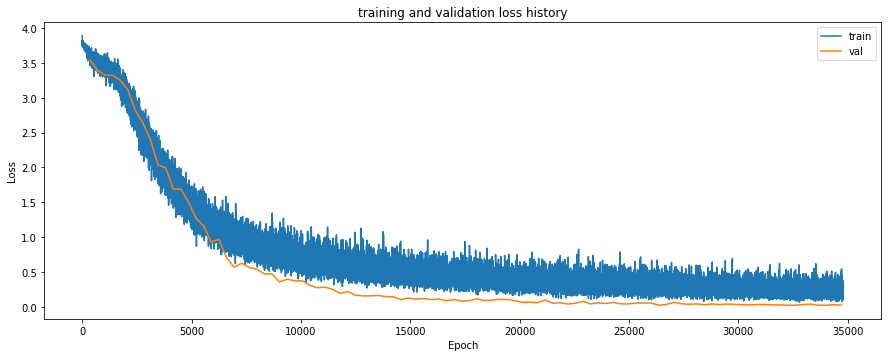

CPU times: user 4min 17s, sys: 1min 16s, total: 5min 34s
Wall time: 4min 18s


In [17]:
%%time

train_losses = []
valid_losses = []
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        print("EPOCH {} :".format(i+1), end=' ')
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, train_loss = sess.run([training_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            train_losses.append(train_loss)
        validation_accuracy, valid_loss = evaluate(X_valid, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        valid_losses.append(valid_loss)
                
    saver.save(sess, './model/lenet.ckpt')
    print("Model saved")
    
plt.subplot(2, 1, 2)
plt.plot(train_losses, label='train')
plt.plot([(i+1) * int(num_examples / BATCH_SIZE) for i in range(EPOCHS)], valid_losses, label='val')
plt.title('training and validation loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.gcf().set_size_inches(15, 12)
plt.legend()
plt.show()

INFO:tensorflow:Restoring parameters from ./model/lenet.ckpt


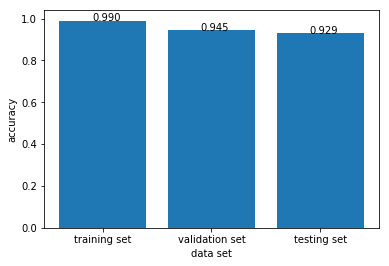

In [18]:
with tf.Session() as sess:
    saver.restore(sess, './model/lenet.ckpt')
    train_accuracy,_ = evaluate(X_train, y_train)
    valid_accuracy,_ = evaluate(X_valid, y_valid)
    test_accuracy,_ = evaluate(X_test, y_test)
    
accuracys = [train_accuracy, valid_accuracy, test_accuracy]
tick_labels = ["training set", "validation set", "testing set"]
plt.bar(range(3), accuracys)
plt.xlabel('data set')
plt.ylabel('accuracy')
plt.xticks(range(3), tick_labels)
for x_,y_ in zip(range(3), accuracys):
    plt.text(x_ - 0.1, y_, '%.3f'%y_)
plt.show()

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
import cv2

#reading in an image
import glob
import pandas as pd
import matplotlib.image as mpimg

Input Image 0 (32, 32, 3)
Input Image 1 (32, 32, 3)
Input Image 2 (32, 32, 3)
Input Image 3 (32, 32, 3)
Input Image 4 (32, 32, 3)
Input Image 5 (32, 32, 3)
After Processing Image: (6, 32, 32, 1)


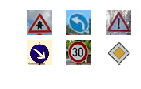

In [20]:
X_final_test = []
X_final_test_name = []

fig, axs = plt.subplots(2,3, figsize=(2, 1))
fig.subplots_adjust(hspace = .2, wspace=.2)
axs = axs.ravel()

def pipeline(file):
    global X_final_test
    my_images = []
    for i, img in enumerate(glob.glob(file)):
        X_final_test_name.append(img)
        image = cv2.imread(img)
        print('Input Image '+ str(i) + ' ' + str(image.shape))
        axs[i].axis('off')
        axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        my_images.append(image)
    my_images = np.asarray(my_images)
    my_images_gry = np.sum(my_images/3, axis=3, keepdims=True)
    processed_image = (my_images_gry - 128)/128 
    print('After Processing Image: ' + str(processed_image.shape))

    return processed_image

X_final_test = pipeline('./found-images/*.png')
X_final_graph = X_final_test

INFO:tensorflow:Restoring parameters from ./model/lenet.ckpt


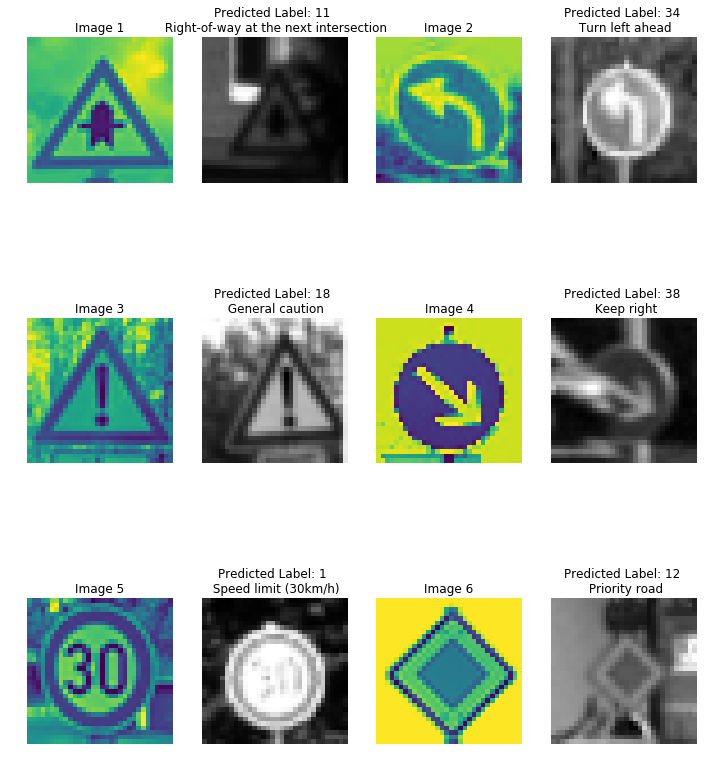

In [21]:
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./model/lenet.ckpt.meta')
    saver.restore(sess, "./model/lenet.ckpt")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: X_final_test, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: X_final_test, keep_prob: 1.0})

    
    fig, axs = plt.subplots(3,4, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(X_final_test):
        axs[2*i].axis('off')
        axs[2*i].imshow(image.reshape((32,32)))
        axs[2*i].set_title('Image '+ str(i + 1))
        pred_label = my_top_k[1][i][0]
        index = np.argwhere(y_valid == pred_label)[0]
        axs[2*i+1].axis('off')
        axs[2*i+1].imshow(X_valid[index].squeeze(), cmap='gray')
        axs[2*i+1].set_title('Predicted Label: {} \n {}'.format(pred_label, label_signs[pred_label]))

In [24]:
with tf.Session() as sess:
    softmax = tf.nn.softmax(my_softmax_logits)
    top5 = sess.run(tf.nn.top_k(softmax, k=5))
    for x in range(len(X_final_test)):
        print("File Name: [ '{0}' ]".format(X_final_test_name[x]))
        for y in range(5):
            print("{:s}: {:.8f}".format(label_signs[top5[1][x][y]], top5[0][x][y]))
        print('\n')


File Name: [ './found-images/1.png' ]
Right-of-way at the next intersection: 0.06075329
Beware of ice/snow: 0.02237554
Speed limit (20km/h): 0.02236271
Speed limit (30km/h): 0.02236271
Speed limit (50km/h): 0.02236271


File Name: [ './found-images/6.png' ]
Turn left ahead: 0.06078671
Keep right: 0.02236226
Speed limit (60km/h): 0.02236222
Go straight or right: 0.02236222
Speed limit (20km/h): 0.02236222


File Name: [ './found-images/8.png' ]
General caution: 0.06078572
Traffic signals: 0.02236265
Speed limit (20km/h): 0.02236224
Speed limit (30km/h): 0.02236224
Speed limit (50km/h): 0.02236224


File Name: [ './found-images/5.png' ]
Keep right: 0.06078682
Speed limit (20km/h): 0.02236222
Speed limit (30km/h): 0.02236222
Speed limit (50km/h): 0.02236222
Speed limit (60km/h): 0.02236222


File Name: [ './found-images/2.png' ]
Speed limit (30km/h): 0.06078500
Speed limit (50km/h): 0.02236284
Speed limit (20km/h): 0.02236233
Speed limit (70km/h): 0.02236227
Speed limit (60km/h): 0.022362